# Regressão Linear Python
#### Aplicando o algoritmo de regressão linear em uma base de dados de venda de casas.

### Pré-processamento de dados

In [1]:
# importando a biblioteca pandas do python
import pandas as pd

In [2]:
# importando a base de dados para o 'dataframe'
dataframe = pd.read_csv('house_prices.csv', encoding = 'utf-8', sep = ',')

In [4]:
# visualizando o dataframe
dataframe

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Para esse exemplo, queremos somente os dados da metragem da casa para prever seu custo.

In [5]:
# separando as variáveis x e y
x = dataframe.iloc[:, 5:6].values
y = dataframe.iloc[:, 2].values

In [7]:
# visualizando os registros x 
print(x)

[[1180]
 [2570]
 [ 770]
 ...
 [1020]
 [1600]
 [1020]]


In [8]:
# visualizando os registros y
print(y)

[221900. 538000. 180000. ... 402101. 400000. 325000.]


In [9]:
# importando a biblioteca sklearn do python
from sklearn.model_selection import train_test_split

In [23]:
# separando o modelo de treinamento e o modelo de teste
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [24]:
# visulizando a dimensão de'x_treinamento'
print(x_treinamento.shape)

(15129, 1)


In [25]:
# visualizando a dimensão de 'y_treinamento'
print(y_treinamento.shape)

(15129,)


In [26]:
# visualizando a dimensão de 'x_teste'
print(x_teste.shape)

(6484, 1)


In [27]:
# visualizando a dimensão de 'y_teste'
print(y_teste.shape)

(6484,)


### Algoritmo Regressão Linear

In [16]:
# importando a biblioteca sklearn do python
from sklearn.linear_model import LinearRegression

In [17]:
# criando o objeto 'regressor'
regressor = LinearRegression()

In [28]:
# realizando o treinamento do algoritmo com a base de dados de treinamento
regressor.fit(x_treinamento, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
# observando a porcentagem de adaptação do modelo criado com os dados
score = regressor.score(x_treinamento, y_treinamento)
# imprimindo na saída de dados a porcentagem
print(score)

0.49453356717789776


Observe que o modelo criado não se adaptou muito bem aos dados.

### Visualizando os gráficos de predição

In [31]:
# importando a biblioteca matplotlib do python
import matplotlib.pyplot as plt
%matplotlib inline

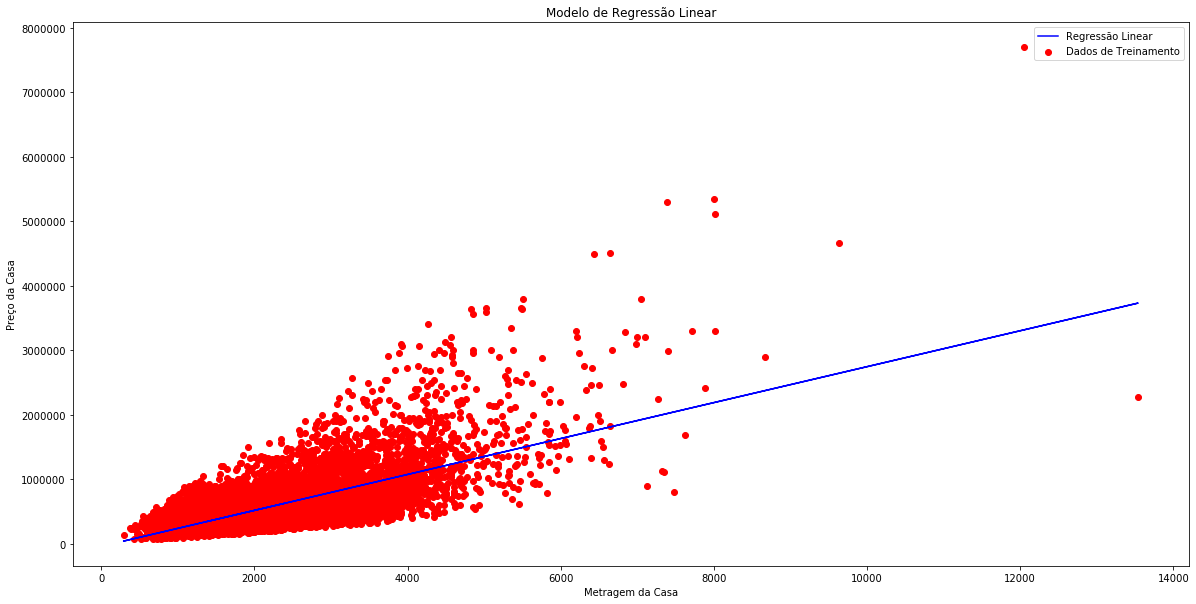

In [34]:
# organizando o dimensionamento do gráfico
plt.figure(figsize = (20, 10))

# importando os dados no gráfico
plt.scatter(x_treinamento, y_treinamento, color = 'red', label = 'Dados de Treinamento')

# plotando a reta obtida pelo algoritmo
plt.plot(x_treinamento, regressor.predict(x_treinamento), color = 'blue', label = 'Regressão Linear')

# colocando um título no gráfico
plt.title('Modelo de Regressão Linear')

# colocando uma legenda no eixo x
plt.xlabel('Metragem da Casa')

# colocando uma legenda no eixo y
plt.ylabel('Preço da Casa')

# colocando uma grade ao gráfico
plt.grid(True)

# adicionando a legenda ao gráfico
plt.legend()

# removendo a moldura do gráfico
plt.grid(False)

### Fazendo a predição com a base de testes

In [36]:
# obtendo os valores previstos para a base de testes
previsoes = regressor.predict(x_teste)

In [37]:
# visualizando as previsoes
previsoes

array([ 360116.30871034, 1261900.99358095,  362899.59477476, ...,
        560512.90534826,  374032.73903242,  329500.16200177])

### Visualizando os erros do Algoritmo

In [35]:
# importando a biblioteca sklearn do python
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
# visualizando o erro absoluto e o erro médio
mae = mean_absolute_error(y_teste, previsoes)
mse = mean_squared_error(y_teste, previsoes)

In [39]:
# visualizando o erro absoluto
print(mae)

172604.12889995414


Esse valor indica que o algoritmo tem um limite de erro de mais ou menos 172604.12889995414.

In [41]:
# outra forma de visualizar o erro absoluto
resultado = abs(y_teste - previsoes)
# média da diferença dos valores
resultado.mean()

172604.12889995414

In [42]:
# visualizando o erro médio
print(mse)

70170013932.11592


### Visualizando o gráfico para a base de teste

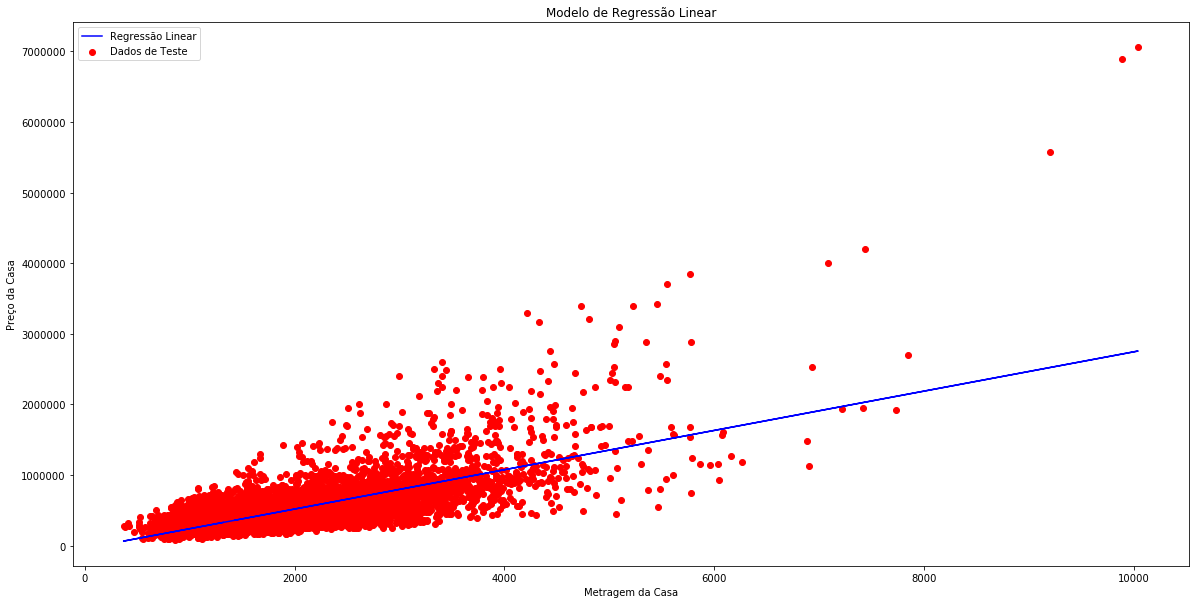

In [43]:
# organizando o dimensionamento do gráfico
plt.figure(figsize = (20, 10))

# importando os dados no gráfico
plt.scatter(x_teste, y_teste, color = 'red', label = 'Dados de Teste')

# plotando a reta obtida pelo algoritmo
plt.plot(x_teste, regressor.predict(x_teste), color = 'blue', label = 'Regressão Linear')

# colocando um título no gráfico
plt.title('Modelo de Regressão Linear')

# colocando uma legenda no eixo x
plt.xlabel('Metragem da Casa')

# colocando uma legenda no eixo y
plt.ylabel('Preço da Casa')

# colocando uma grade ao gráfico
plt.grid(True)

# adicionando a legenda ao gráfico
plt.legend()

# removendo a moldura do gráfico
plt.grid(False)

### Visualizando graficamente o erro do algoritmo

In [45]:
# importando a biblioteca yellowbrick do python
from yellowbrick.regressor import ResidualsPlot

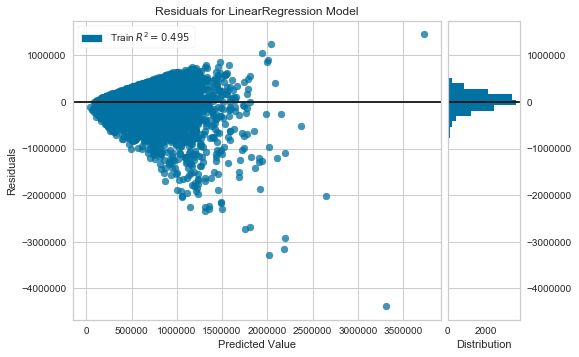

In [47]:
# configurando o objeto 'visualizador'
visualizador  = ResidualsPlot(regressor)
# passando as variaveis x e y para o 'visualizador'
visualizador.fit(x_treinamento, y_treinamento)
# obtendo a porcentagem de adaptação dos dados em relação ao modelo feito
visualizador.poof()

### Alguma Dúvida? Entre em Contato Comigo:

- [Me envie um e-mail](mailto:alyssonmachado388@gmail.com);